# [SDE](https://www.youtube.com/watch?v=FR32OpylCi0)

# Black-Schole Model

$$
\frac{dS_t}{S_t}=\mu dt+\sigma dB_t
\quad\mbox{or}\quad
dS_t = \mu S_t dt+\sigma S_t dB_t,
\quad S_0\ \mbox{given}
$$

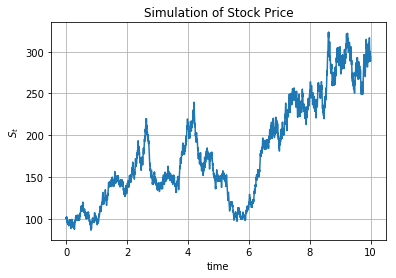

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21
num_years = 10
S_0 = 100
mu = 0.1
sigma = 0.3
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_steps_per_year*num_years, ))
c = np.ones_like(u)
c[u < 0.5] = -1.
# print(c.shape) # (2520,)
# print(c.dtype) # float64

# Brownian motion
b = np.cumsum(c) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0)

# time
t = np.linspace(0, num_years, num_steps_per_year*num_years + 1) 

# dt
dt = 1 / num_steps_per_year

# db
db = c / np.sqrt(num_steps_per_year) 

# SDE
S = S_0 * np.ones_like(b)
for i in range(len(db)):
    # dS_t = \mu S_t dt+\sigma S_t dB_t
    dS = mu * S[i] * dt + sigma * S[i] * db[i] 
    S[i+1] = S[i] + dS 

# Simulation of Stock Price 
plt.plot(t, S)
plt.title('Simulation of Stock Price')
plt.xlabel('time')
plt.ylabel('$S_t$')
plt.grid(True)
plt.show()

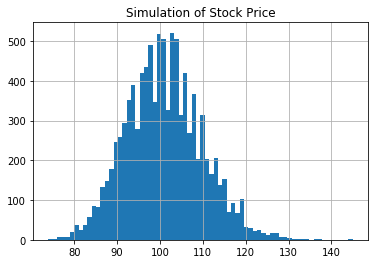

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21*100
num_years = 1/12
num_simulation = 10000 
S_0 = 100
mu = 0.1
sigma = 0.3
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_simulation, int(num_steps_per_year*num_years)))
c = np.ones_like(u)
c[u < 0.5] = -1.
# print(c.shape) # (2520,)
# print(c.dtype) # float64

# Brownian motion
b = np.cumsum(c, axis=1) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0, axis=1)
# print(b.shape) # (2520,)
# print(b.dtype) # float64

# # time
t = np.linspace(0, num_years, int(num_steps_per_year*num_years) + 1) 

# dt
dt = 1 / num_steps_per_year

# db
db = c / np.sqrt(num_steps_per_year) 

# SDE
S = S_0 * np.ones_like(b)
for i in range(int(num_steps_per_year*num_years)):
    # dS_t = \mu S_t dt+\sigma S_t dB_t
    dS = mu * S[:,i] * dt + sigma * S[:,i] * db[:,i] 
    S[:,i+1] = S[:,i] + dS
# print(S[:,-1])
# print(S)

# histogram of S_10
plt.hist(S[:,-1], bins=70)
plt.title('Simulation of Stock Price')
plt.grid(True)
plt.show()

# Vasicek Model

$$
dr_t=a(r_{\mbox{target}}-r_t) dt+\sigma dB_t,
\quad r_0\ \mbox{given}
$$

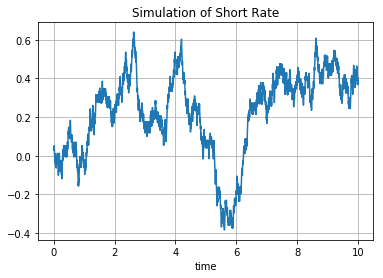

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21
num_years = 10
r_0 = 0.03
r_target = 0.05
a = 0.1
sigma = 0.3
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_steps_per_year*num_years, ))
c = np.ones_like(u)
c[u < 0.5] = -1

# Brownian motion
b = np.cumsum(c) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0)

# time
t = np.linspace(0, num_years, num_steps_per_year*num_years + 1) 

# dt
dt = 1 / num_steps_per_year

# db
db = c / np.sqrt(num_steps_per_year) 

# SDE
r = r_0 * np.ones_like(b)
for i in range(len(db)):
    # dr_t = a (r_{\mbox{target}}-r_t) dt + \sigma dB_t
    dr = a * (r_target - r[i]) * dt + sigma * db[i] 
    r[i+1] = r[i] + dr 


# Simulation of Stock Price 
plt.plot(t, r)
plt.title('Simulation of Short Rate')
plt.xlabel('time')
plt.grid(True)
plt.show()

# CIR Model

$$
dr_t=a(r_{\mbox{target}}-r_t) dt+\sigma \sqrt{r_t}dB_t,
\quad r_0\ \mbox{given}
$$

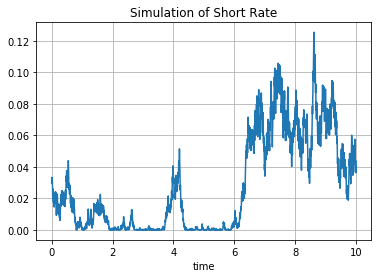

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps_per_year = 12*21
num_years = 10
r_0 = 0.03
r_target = 0.05
a = 0.1
sigma = 0.3
# set parameters ###############################################################

np.random.seed(337)

# fair coins
u = np.random.uniform(0, 1, (num_steps_per_year*num_years, ))
c = np.ones_like(u)
c[u < 0.5] = -1

# Brownian motion
b = np.cumsum(c) / np.sqrt(num_steps_per_year)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
b = np.insert(b, 0, 0)

# time
t = np.linspace(0, num_years, num_steps_per_year*num_years + 1) 

# dt
dt = 1 / num_steps_per_year

# db
db = c / np.sqrt(num_steps_per_year) 

# SDE
r = r_0 * np.ones_like(b)
for i in range(len(db)):
    # dr_t = a (r_{\mbox{target}}-r_t) dt + \sigma \sqrt{t_t} dB_t
    dr = a * (r_target - r[i]) * dt + sigma * np.sqrt(r[i]) * db[i] 
    r[i+1] = np.maximum(r[i] + dr, 0) 


# Simulation of Stock Price 
plt.plot(t,r)
plt.title('Simulation of Short Rate')
plt.xlabel('time')
plt.grid(True)
plt.show()